In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
FIG_WIDTH = 5
FIG_HEIGHT = 4

In [2]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 5
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


# Task-1

QN-1.1

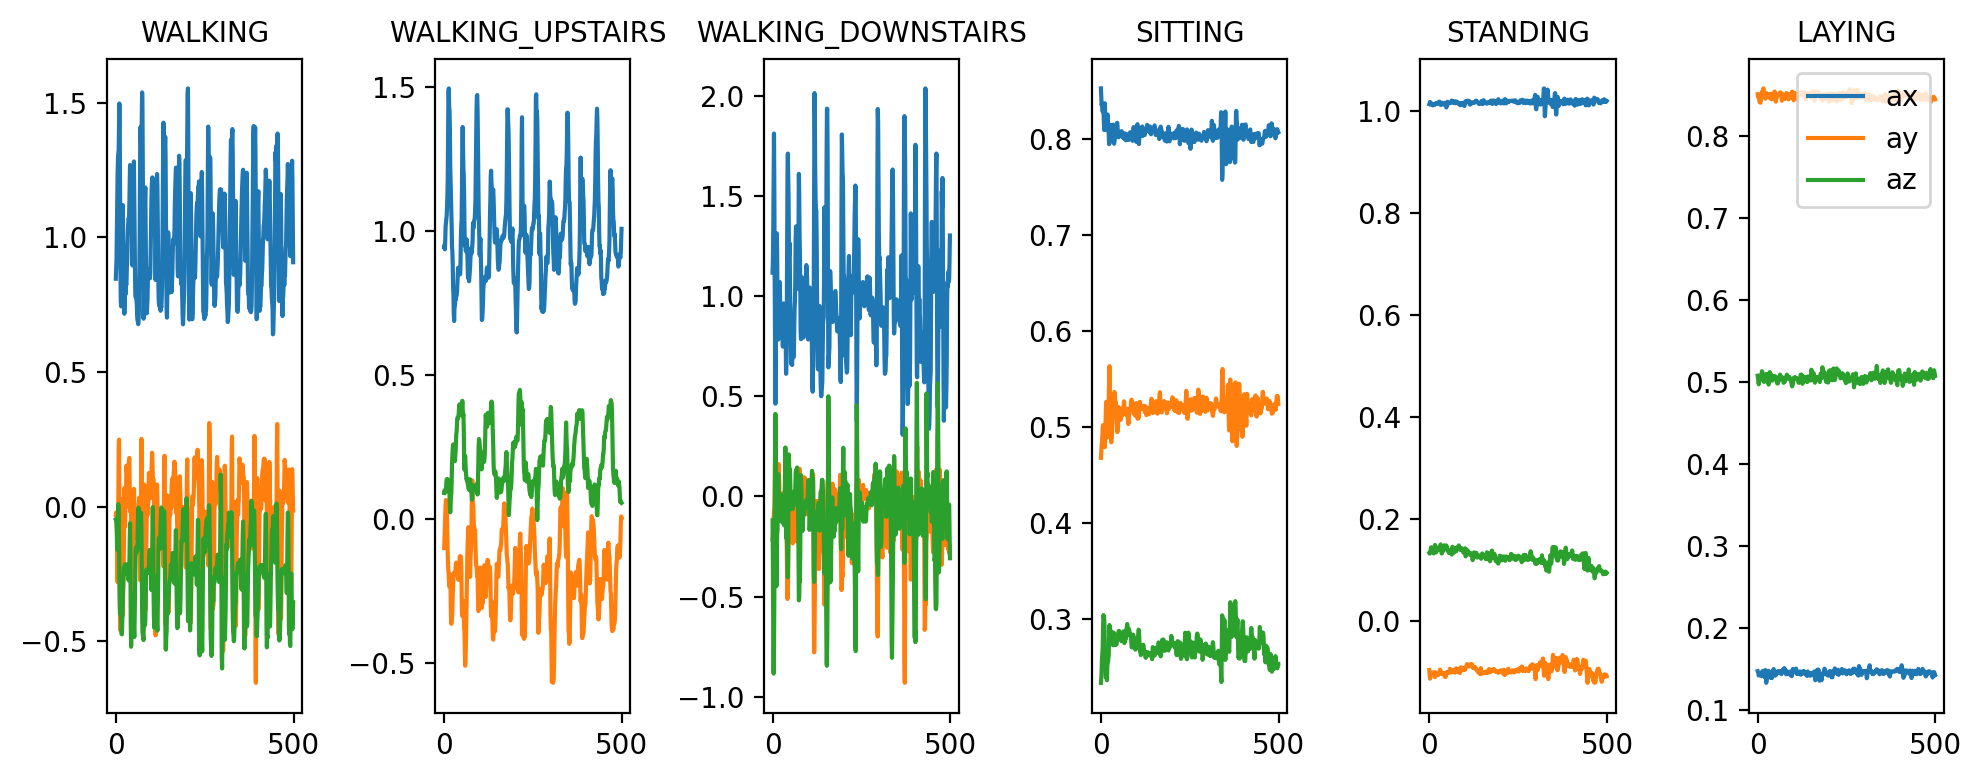

In [3]:
plt.figure(figsize=(10,4))
activity=["WALKING","WALKING_UPSTAIRS ","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

for i in range(1,7):
    for j in range(len(y_train)):
        if y_train[j]==i:
            
            plt.subplot(1,6,i)
            
            plt.plot(X_train[j],label=["ax","ay","az"])
            plt.title(activity[i-1],fontsize=10)
            break

plt.tight_layout()

plt.legend(loc="upper right")
plt.show()



QN-1.2

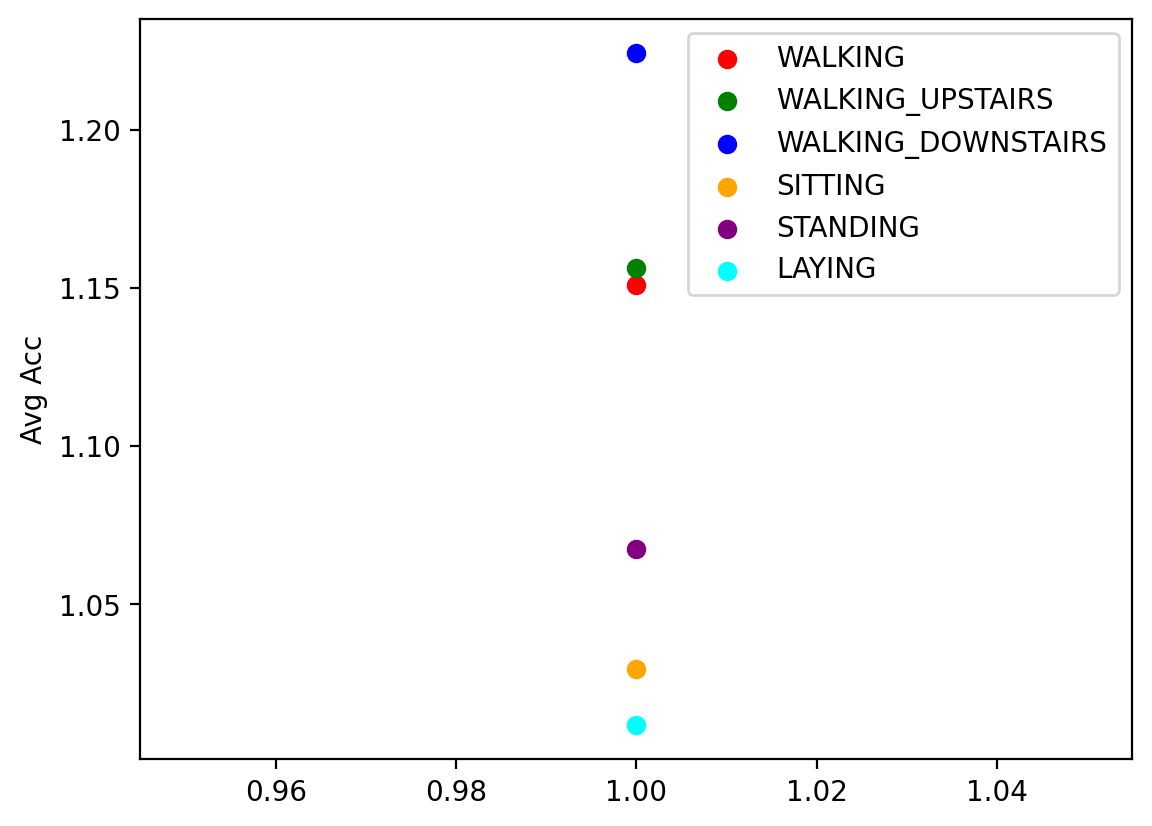

In [4]:
total_linear_acc=np.zeros(6)
no_of_activities=np.zeros(6)
for i in range(126): 
        j=y_train[i]-1 
        no_of_activities[j]+=1
        linear_acc=np.mean(np.sum(X_train[i]**2, axis=1))
        total_linear_acc[j]+=linear_acc
total_mean_linear_acc=total_linear_acc/no_of_activities
colors = ['red', 'green', 'blue', 'orange', 'purple',"cyan"]
for i in range(6):
        plt.scatter(1,total_mean_linear_acc[i],color=colors[i],label=activity[i])

plt.legend()
plt.ylabel("Avg Acc")
plt.show()

As per the above scatter plot, when the linear accelaration is above 1.10 then its dynamic activity and if its below that then it is static activity, we can also see the above graphs and conclude that dynamic actities have a lot a variaton in their plots whereas static activities have very less variation.

QN-1.3.1

(126, 500)
correlaton between two features :  -1.1908856219771907e-17


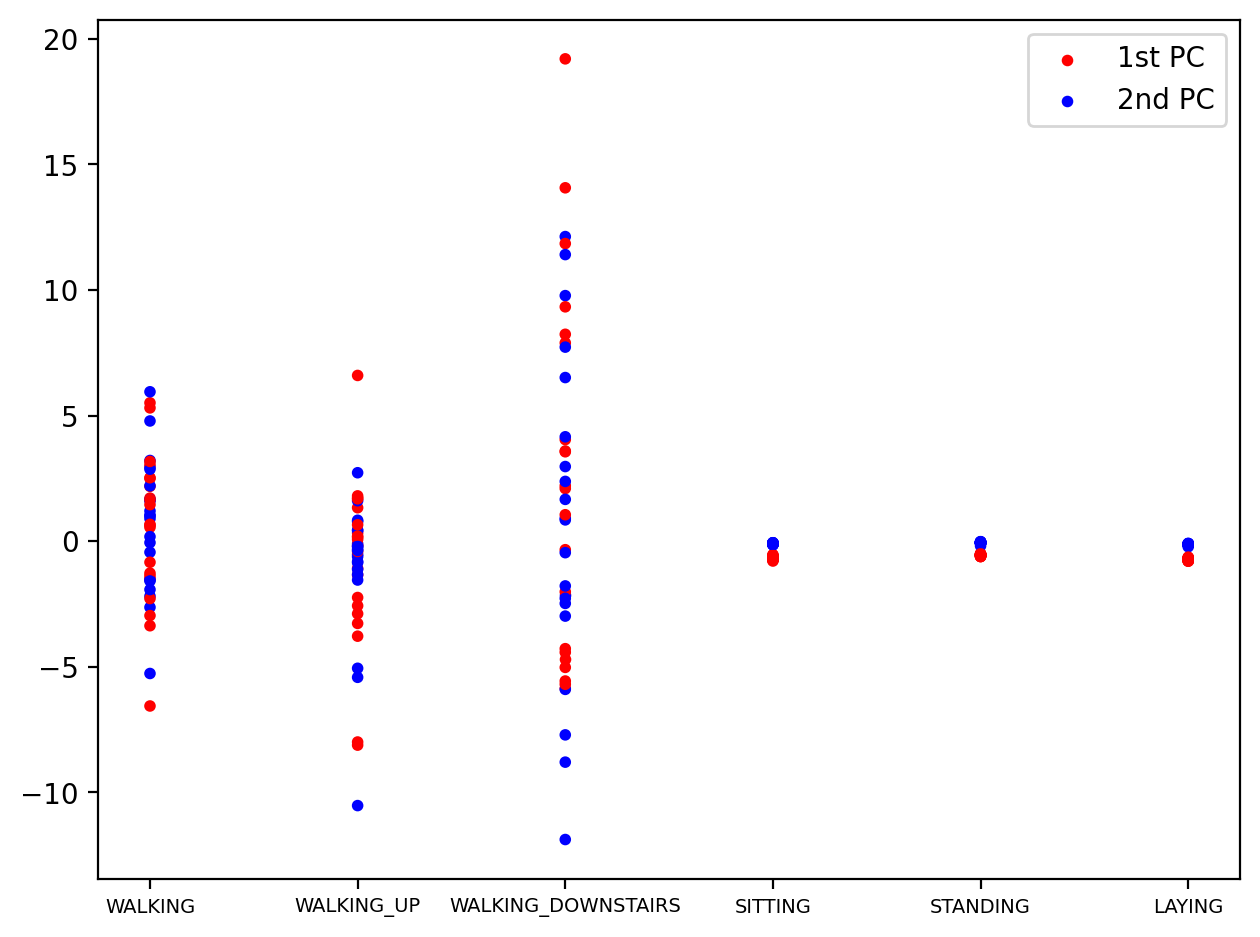

In [5]:
linear_acc=np.sum(X_train**2, axis=2)
print(linear_acc.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Apply PCA
X_reduced = pca.fit_transform(linear_acc)
correlation = np.corrcoef(X_reduced[:,0], X_reduced[:,1])[0, 1]
print("correlaton between two features : ", correlation)
plt.scatter(y_train[0], X_reduced[0][0], color="red", s=10, label="1st PC")
plt.scatter(y_train[0], X_reduced[0][1], color="blue", s=10, label="2nd PC")
for i in range(1,126):
    plt.scatter([y_train[i]]*2,X_reduced[i],color=["red","blue"],s=10)
plt.legend()
plt.xticks([1,2,3,4,5,6],['WALKING', 'WALKING_UP', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],fontsize=7)
plt.tight_layout()
plt.show()


In [6]:
print(len(X_test))

54


QN-1.3.2

In [7]:

import pandas as pd
import numpy as np
import tsfel
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Assuming each activity has its own folder and each folder contains CSV files
activity_dirs = {
    'LAYING': r"Combined\Train\LAYING",
    'SITTING': r"Combined\Train\SITTING",
    'STANDING': r"Combined\Train\STANDING",
    'WALKING': r"Combined\Train\WALKING",
    'WALKING_DOWNSTAIRS': r"Combined\Train\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"Combined\Train\WALKING_UPSTAIRS"
}
# Initialize lists to store features and labels
features_list = []
labels = []

# Extract features for each activity
for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        # Extract features using TSFEL
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0,fs=100)
        
        features_list.append(features.values.flatten())
        labels.append(activity)

# Convert lists to arrays
features_array = np.array(features_list)
labels = np.array(labels)

activity_dirs = {
    'LAYING': r"Combined\Test\LAYING",
    'SITTING': r"Combined\Test\SITTING",
    'STANDING': r"Combined\Test\STANDING",
    'WALKING': r"Combined\Test\WALKING",
    'WALKING_DOWNSTAIRS': r"Combined\Test\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"Combined\Test\WALKING_UPSTAIRS"
}

features_list_test=[]
labels_test=[]

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        # Extract features using TSFEL
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0,fs=100)
        
        features_list_test.append(features.values.flatten())
        labels_test.append(activity)

# Convert lists to arrays
features_array_test = np.array(features_list_test)
labels_test = np.array(labels_test)

In [8]:
print(features_array.shape)
print(features_array_test.shape)
print(labels.shape)

(126, 1167)
(54, 1167)
(126,)


QN-1.3.3

(126,)
(126, 1167)
(126, 2)
correlaton between two features :  5.589732107959921e-17


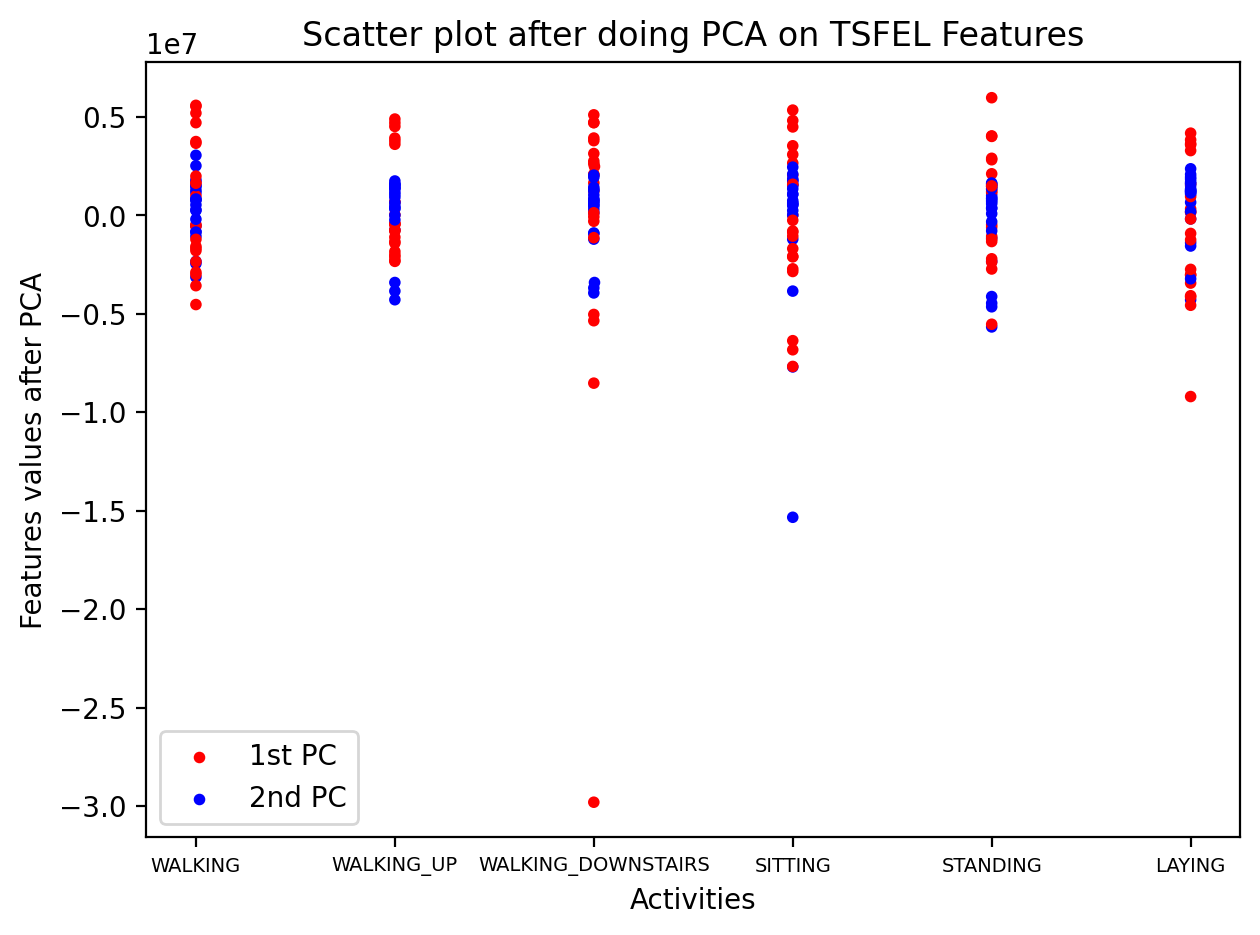

In [9]:
print(np.arange(len(features_array)).shape)
print(features_array.shape)
pca = PCA(n_components=2)

# Apply PCA
X_reduced_tsf = pca.fit_transform(features_array)
print(X_reduced_tsf.shape)
correlation = np.corrcoef(X_reduced_tsf[:,0], X_reduced_tsf[:,1])[0, 1]
print("correlaton between two features : ", correlation)
plt.scatter(y_train[0], X_reduced_tsf[0][0], color="red", s=10, label="1st PC")
plt.scatter(y_train[0], X_reduced_tsf[0][1], color="blue", s=10, label="2nd PC")
for i in range(1,126):
    plt.scatter([y_train[i]]*2,X_reduced_tsf[i],color=["red","blue"],s=10)
plt.xticks([1,2,3,4,5,6],['WALKING', 'WALKING_UP', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],fontsize=7)
plt.legend()
plt.title("Scatter plot after doing PCA on TSFEL Features")
plt.ylabel("Features values after PCA")
plt.xlabel("Activities")
plt.tight_layout()
plt.show()

QN-1.3.4

correlaton between two features :  -2.47041544289362e-18


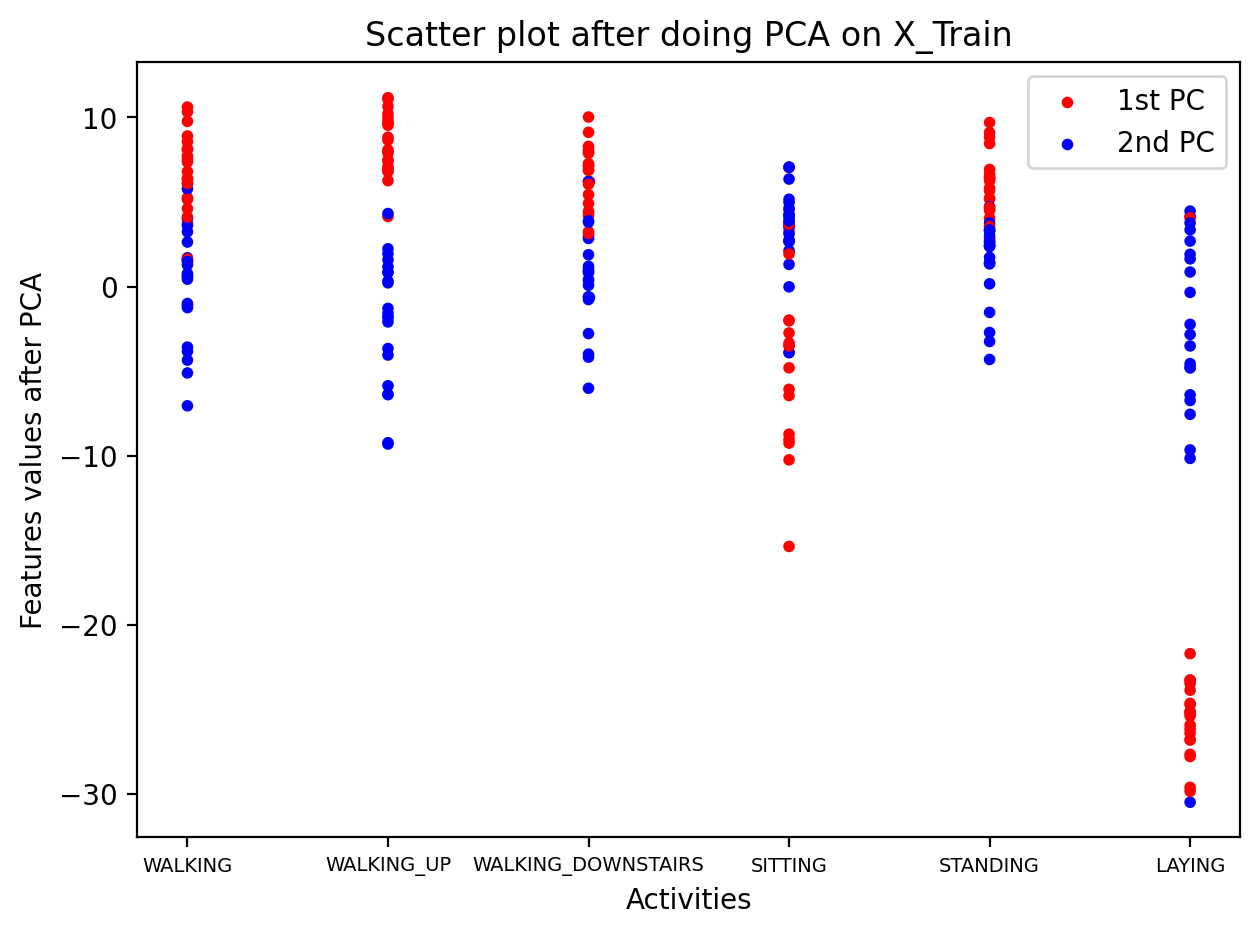

In [10]:
X_train_flattened = X_train.reshape(126, -1)
X_train_pca2=pca.fit_transform(X_train_flattened)

correlation = np.corrcoef(X_train_pca2[:,0], X_train_pca2[:,1])[0, 1]
print("correlaton between two features : ", correlation)
plt.scatter(y_train[0], X_train_pca2[0][0], color="red", s=10, label="1st PC")
plt.scatter(y_train[0], X_train_pca2[0][1], color="blue", s=10, label="2nd PC")
for i in range(1,126):
    plt.scatter([y_train[i]]*2,X_train_pca2[i],color=["red","blue"],s=10)
plt.xticks([1,2,3,4,5,6],['WALKING', 'WALKING_UP', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],fontsize=7)
plt.legend()
plt.title("Scatter plot after doing PCA on X_Train")
plt.ylabel("Features values after PCA")
plt.xlabel("Activities")
plt.tight_layout()
plt.show()


QN-1.3.4

Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

Ans-  Based on the correlation factors after PCA in the above three cases, all the pairs of features are independent of each other, but for visualizing the data, the scatter plot of features after PCA in X_train is better as per the graph.

QN-1.4

Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

In [45]:
X_tsf_df = pd.DataFrame(features_array)

correlation_matrix = X_tsf_df.corr()

threshold = 0.89

# Find highly correlated feature pairs
high_corr_pairs = np.where(abs(correlation_matrix)>threshold)
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                   for x,y in zip(*high_corr_pairs) if x!=y and x<y]

# Collect unique features involved in high correlation pairs
redundant_features = set()
for pair in high_corr_pairs:
    redundant_features.update(pair)
print(f"Number of redundant features in tsfel data: {len(redundant_features)}")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_array = features_array  # TSFEL data with 126 samples and 1167 features

# Compute the correlation matrix
correlation_matrix = np.corrcoef(data_array, rowvar=False)
print("correlation_matrix of tsfel features: ")
print(correlation_matrix)
print("----------------------------------------------------")
data_array = X_train_flattened
print("correlation_matrix of provided features: ")

correlation_matrix = np.corrcoef(data_array, rowvar=False)

print(correlation_matrix)


Number of redundant features in tsfel data: 710
correlation_matrix of tsfel features: 
[[ 1.          0.98234953 -0.4201622  ...  0.09176493  0.09781391
   0.3689784 ]
 [ 0.98234953  1.         -0.32026499 ...  0.04307701  0.05208199
   0.24803607]
 [-0.4201622  -0.32026499  1.         ... -0.49732626 -0.49166376
  -0.56035517]
 ...
 [ 0.09176493  0.04307701 -0.49732626 ...  1.          0.98194753
   0.25976332]
 [ 0.09781391  0.05208199 -0.49166376 ...  0.98194753  1.
   0.26215308]
 [ 0.3689784   0.24803607 -0.56035517 ...  0.25976332  0.26215308
   1.        ]]
----------------------------------------------------
correlation_matrix of provided features: 
[[ 1.         -0.61627004 -0.54543147 ...  0.7419767  -0.63589265
  -0.41606834]
 [-0.61627004  1.          0.6446111  ... -0.6185947   0.85591455
   0.62916351]
 [-0.54543147  0.6446111   1.         ... -0.53645152  0.65049118
   0.83731756]
 ...
 [ 0.7419767  -0.6185947  -0.53645152 ...  1.         -0.72723993
  -0.56995327]
 [-0.

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


There are many redundant features in tsfel data as per the above output

# Task 2

QN-2.1.1

Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Loading data from text files
def load_data(file_path):
    return np.loadtxt(file_path)

train_data_path = r"train\X_train.txt"
test_data_path = r"test\X_test.txt"
train_labels_path = r"train\y_train.txt"
test_labels_path = r"test\y_test.txt"

X_train_raw = load_data(train_data_path)
X_test_raw = load_data(test_data_path)
y_train_raw = load_data(train_labels_path)
y_test_raw = load_data(test_labels_path)

clf_raw = DecisionTreeClassifier(random_state=0)

# Train the model
clf_raw.fit(X_train_raw, y_train_raw)

# Make predictions on the test set
y_pred_raw = clf_raw.predict(X_test_raw)
accuracy = accuracy_score(y_test_raw, y_pred_raw)
precision = precision_score(y_test_raw, y_pred_raw, average='weighted')
recall = recall_score(y_test_raw, y_pred_raw, average='weighted')
conf_matrix = confusion_matrix(y_test_raw, y_pred_raw)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.86
Precision: 0.86
Recall: 0.86
Confusion Matrix:
[[448  24  24   0   0   0]
 [ 74 367  30   0   0   0]
 [ 23  46 351   0   0   0]
 [  0   0   0 373 118   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


In [13]:
print(X_train_raw.shape)
print(y_train_raw.shape)


(7352, 561)
(7352,)


QN-2.1.2

Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [14]:

X_train_tsf, X_test_tsf, y_train_tsf, y_test_tsf = train_test_split(features_array, labels, test_size=0.2, random_state=42)
clf_tsf = DecisionTreeClassifier(random_state=42)

clf_tsf.fit(X_train_tsf, y_train_tsf)


y_pred_tsf = clf_tsf.predict(X_test_tsf)

accuracy = accuracy_score(y_test_tsf, y_pred_tsf)
precision = precision_score(y_test_tsf, y_pred_tsf, average='weighted')
recall = recall_score(y_test_tsf, y_pred_tsf, average='weighted')
conf_matrix = confusion_matrix(y_test_tsf, y_pred_tsf)
report = classification_report(y_test_tsf, y_pred_tsf)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.85
Precision: 0.89
Recall: 0.85
Confusion Matrix:
[[5 1 0 0 0 0]
 [0 3 1 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 4 0 1]
 [0 0 0 0 3 1]
 [0 0 0 0 0 2]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.83      0.91         6
           SITTING       0.75      0.75      0.75         4
          STANDING       0.83      1.00      0.91         5
           WALKING       1.00      0.80      0.89         5
WALKING_DOWNSTAIRS       1.00      0.75      0.86         4
  WALKING_UPSTAIRS       0.50      1.00      0.67         2

          accuracy                           0.85        26
         macro avg       0.85      0.86      0.83        26
      weighted avg       0.89      0.85      0.85        26



QN-2.1.3

Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [15]:
clf_3 = DecisionTreeClassifier(random_state=0)
X_train_flattened = X_train.reshape(126, -1)
X_test_flattened = X_test.reshape(54, -1)

clf_3.fit(X_train_flattened, y_train)

# Make predictions
y_pred = clf_3.predict(X_test_flattened)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.52
Precision: 0.52
Recall: 0.52
Confusion Matrix:
[[2 5 2 0 0 0]
 [5 1 2 1 0 0]
 [5 2 1 1 0 0]
 [0 0 0 9 0 0]
 [0 0 0 3 6 0]
 [0 0 0 0 0 9]]


QN-2.1.4

Compare the results of the three models. Which model do you think is better?

In [16]:
df_comparision=pd.DataFrame({"Trained using: ":["Raw accelerometer data","Features obtained by TSFEL","Features provided in the dataset"],
                             "Accuracy":[0.86,0.85,0.52],"Precision":[0.86,0.89,0.52],"Recall":[0.86,0.85,0.52]
                             })
print(df_comparision.to_markdown(index=False))

print("\nBased on the Accuracy, precision and recall we can conclude that model 1 and model 2 are better than model 3\nand model 1 has a slight edge over model 2 as it has balanced metrics and in this case all the metrics have more or less equal weightage")

| Trained using:                   |   Accuracy |   Precision |   Recall |
|:---------------------------------|-----------:|------------:|---------:|
| Raw accelerometer data           |       0.86 |        0.86 |     0.86 |
| Features obtained by TSFEL       |       0.85 |        0.89 |     0.85 |
| Features provided in the dataset |       0.52 |        0.52 |     0.52 |

Based on the Accuracy, precision and recall we can conclude that model 1 and model 2 are better than model 3
and model 1 has a slight edge over model 2 as it has balanced metrics and in this case all the metrics have more or less equal weightage


QN-2.2

Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree.

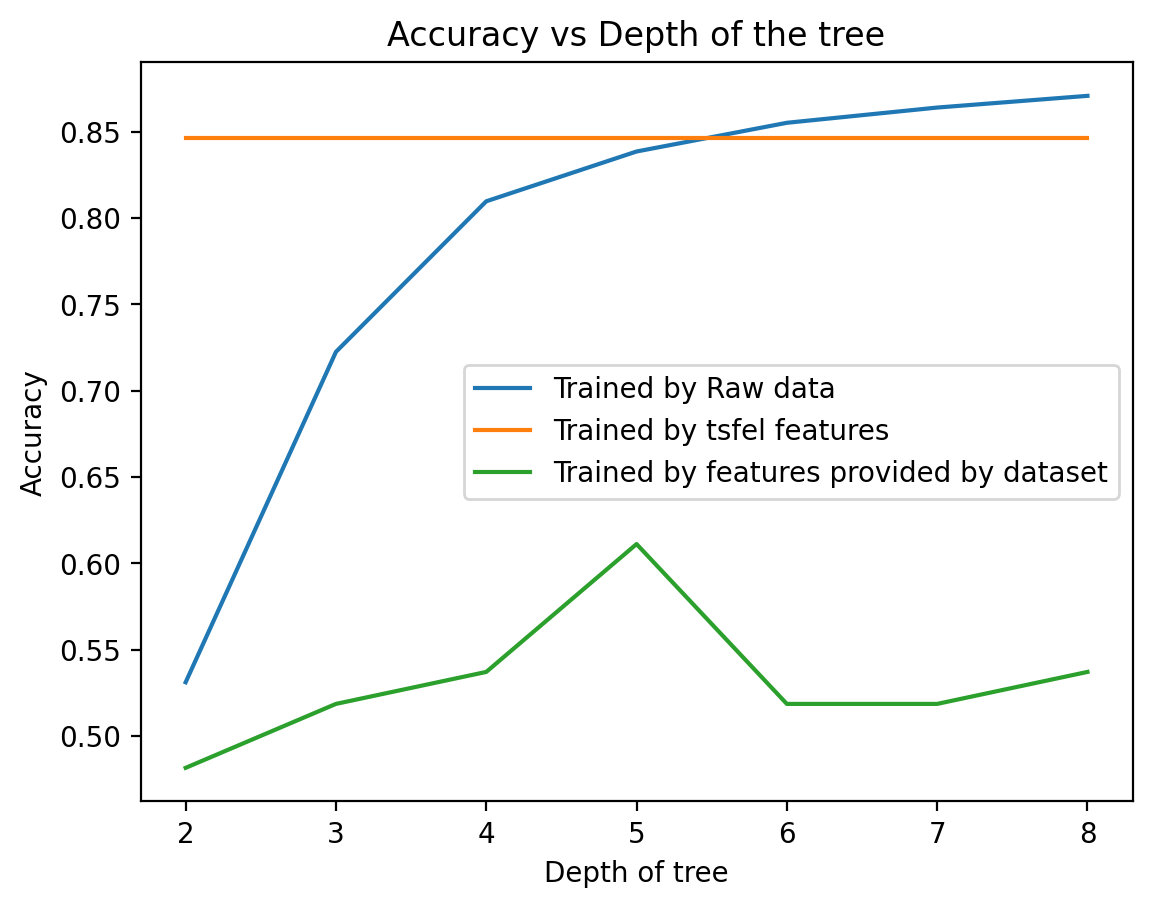

In [17]:
accuracy_21_total=[]
accuracy_22_total=[]
accuracy_23_total=[]

depths=[]
for i in range(2,9):
    clf_21=DecisionTreeClassifier(random_state=0,max_depth=i)
    clf_22=DecisionTreeClassifier(random_state=0,max_depth=i)
    clf_23=DecisionTreeClassifier(random_state=42,max_depth=i)
    # Train the model
    clf_21.fit(X_train_raw, y_train_raw)
    clf_22.fit(X_train_tsf, y_train_tsf)
    clf_23.fit(X_train_flattened, y_train)
    # Make predictions on the test set
    y_pred_raw=clf_21.predict(X_test_raw)
    y_pred_tsf=clf_tsf.predict(X_test_tsf)
    y_pred_3=clf_23.predict(X_test_flattened)
    # for accuracy
    accuracy_21_total.append(accuracy_score(y_test_raw, y_pred_raw))
    accuracy_22_total.append(accuracy_score(y_test_tsf, y_pred_tsf))
    accuracy_23_total.append(accuracy_score(y_test,y_pred_3))
    depths.append(i)
plt.plot(depths,accuracy_21_total,label=["Trained by Raw data"])
plt.plot(depths,accuracy_22_total,label=["Trained by tsfel features"])
plt.plot(depths,accuracy_23_total,label=["Trained by features provided by dataset"])
plt.title("Accuracy vs Depth of the tree")
plt.ylabel("Accuracy")
plt.legend()
plt.xlabel("Depth of tree")
plt.show()
    

QN-2.3

Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

-->From the graph obtained below we can conlcude the models' accuracy is relatively bad in the case of Walking Downstairs

Accuracy for activity 1: 1.00
Accuracy for activity 2: 1.00
Accuracy for activity 3: 0.78
Accuracy for activity 4: 0.89
Accuracy for activity 5: 0.89
Accuracy for activity 6: 0.89


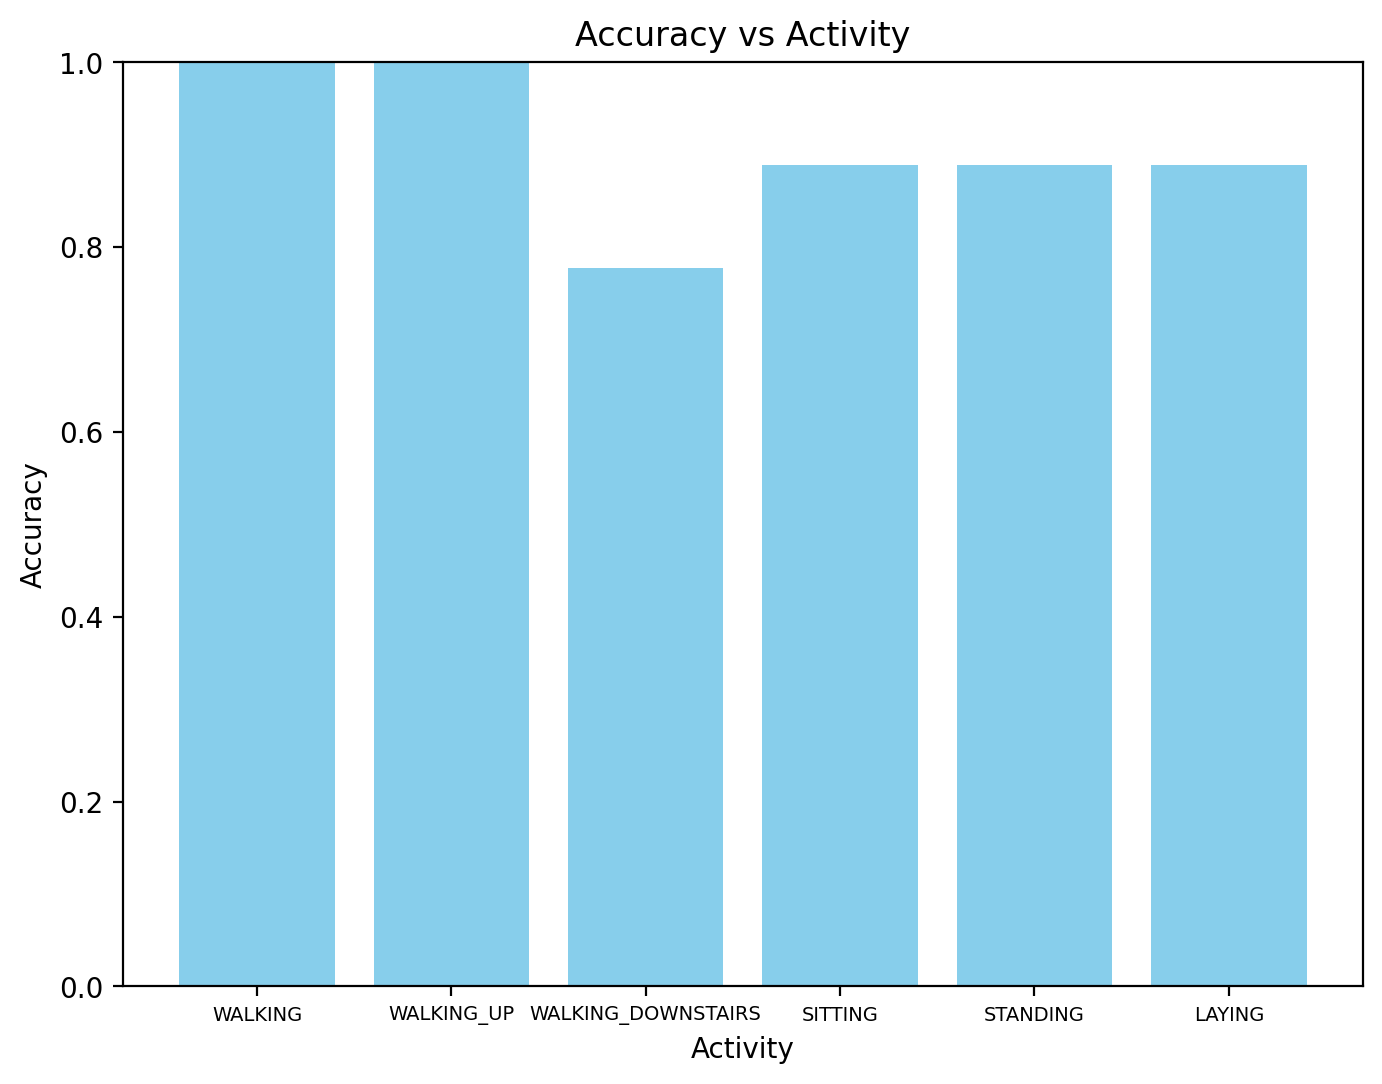

In [18]:
y_pred_tsf = clf_tsf.predict(X_test_tsf)

accuracy = accuracy_score(y_test_tsf, y_pred_tsf)
precision = precision_score(y_test_tsf, y_pred_tsf, average='weighted')
recall = recall_score(y_test_tsf, y_pred_tsf, average='weighted')

activities = [1, 2, 3, 4, 5, 6]

accuracy_list = []
for activity in activities:
    indices = np.where(y_test == activity)
    x_test_activity = features_array_test[indices]
    y_test_activity = labels_test[indices]
    
    y_pred_activity = clf_tsf.predict(x_test_activity)
    
    accuracy = accuracy_score(y_test_activity, y_pred_activity)
    
    # Appending accuracy to the list
    accuracy_list.append(accuracy)
    print(f"Accuracy for activity {activity}: {accuracy:.2f}")

# Plotting the accuracy vs activity
plt.figure(figsize=(8, 6))
plt.bar(activities, accuracy_list, color='skyblue')
plt.xlabel('Activity')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Activity')
plt.xticks(activities, ['WALKING', 'WALKING_UP', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],fontsize=7)
plt.ylim([0, 1]) 
plt.show()


# Task 3

QN-3.1

In [72]:
#ZERO SHOT LEARNING 

import pandas as pd
import numpy as np
from langchain_groq.chat_models import ChatGroq
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

text_file_path = r"train\X_train.txt"
features_file = r"features.txt"
df_x = pd.read_csv(text_file_path, delimiter='\s+', header=None)
df_standardized_x = df_x.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

with open(features_file, 'r') as file:
    feature_names = [line.split()[1] for line in file]
df_standardized_x.columns = feature_names
X_array = df_standardized_x.to_numpy()

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_array)
df_pca = pd.DataFrame(data=X_pca)
print("Original shape:", X_array.shape)
print("Reduced shape:", df_pca.shape)

text_file_path_y = r"train\y_train.txt"
df_y = pd.read_csv(text_file_path_y, delimiter='\s+', header=None)
df_pca_sampled = df_pca.sample(n=40, random_state=1)  
sampled_indices = df_pca_sampled.index
df_y_sampled = df_y.loc[sampled_indices]
X_train = df_pca_sampled
y_train = df_y_sampled

label_mapping = {
    1.0: "WALKING",
    2.0: "WALKING_UPSTAIRS",
    3.0: "WALKING_DOWNSTAIRS",
    4.0: "SITTING",
    5.0: "STANDING",
    6.0: "LAYING"
}

y_train = y_train[0].map(lambda x: label_mapping.get(x, "UNKNOWN"))
y_train = y_train.astype(str)

X_train_split=X_train
y_train_split=y_train

text_file_path = r"test\X_test.txt"
features_file = r"features.txt"
df_x = pd.read_csv(text_file_path, delimiter='\s+', header=None)
df_standardized_x = df_x.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

with open(features_file, 'r') as file:
    feature_names = [line.split()[1] for line in file]
df_standardized_x.columns = feature_names
X_array = df_standardized_x.to_numpy()
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_array)
df_pca = pd.DataFrame(data=X_pca)
print("Original shape:", X_array.shape)
print("Reduced shape:", df_pca.shape)

text_file_path_y = r"test\y_test.txt"
df_y = pd.read_csv(text_file_path_y, delimiter='\s+', header=None)

df_pca_sampled = df_pca.sample(n=10, random_state=1)  
sampled_indices = df_pca_sampled.index
df_y_sampled = df_y.loc[sampled_indices]

X_test = df_pca_sampled
y_test = df_y_sampled

label_mapping = {
    1.0: "WALKING",
    2.0: "WALKING_UPSTAIRS",
    3.0: "WALKING_DOWNSTAIRS",
    4.0: "SITTING",
    5.0: "STANDING",
    6.0: "LAYING"
}

y_test = y_test[0].map(lambda x: label_mapping.get(x, "UNKNOWN"))

y_test = y_test.astype(str)

X_test_split=X_test
y_test_split=y_test

model_name = "llama3-70b"  
groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}
Groq_Token = "##"  

llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

label_set = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

# Function to classify a single sample
def classify_sample(sample):
    features = ", ".join([f"Feature_{i+1}: {value}" for i, value in enumerate(sample)])
    query = f"""
    * You are a human activities classification model.
    * Your task is to analyze the given features and classify them as one of these 6 activities: {', '.join(label_set)}.
    * Provide only the activity label.

    Features:
    {features}
    """
    answer = llm.invoke(query)
    return answer.content.strip()
    

# Function to classify all samples
def classify_samples(X):
    predictions = []
    for _, row in X.iterrows():
        prediction = classify_sample(row)
        predictions.append(prediction)
    return pd.Series(predictions)

train_predictions = classify_samples(X_train_split)
test_predictions = classify_samples(X_test_split)

true_train_labels = np.array(y_train_split.astype(str))
true_test_labels = np.array(y_test_split.astype(str))

train_predictions = np.array(train_predictions.astype(str))
test_predictions = np.array(test_predictions.astype(str))

train_accuracy = accuracy_score(true_train_labels, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(true_test_labels, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Total accuracy=",train_accuracy*0.7+test_accuracy*0.3)

Original shape: (7352, 561)
Reduced shape: (7352, 5)
Original shape: (2947, 561)
Reduced shape: (2947, 5)
Training Accuracy: 0.2250
Testing Accuracy: 0.5000
Total accuracy= 0.3075


QN-3.2

In [94]:
#FEW SHOT LEARNING 

import pandas as pd
import numpy as np
from langchain_groq.chat_models import ChatGroq
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

text_file_path = r"train\X_train.txt"
features_file = r"features.txt"

df_x = pd.read_csv(text_file_path, delimiter='\s+', header=None)

df_standardized_x = df_x.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

with open(features_file, 'r') as file:
    feature_names = [line.split()[1] for line in file]

df_standardized_x.columns = feature_names

X_array = df_standardized_x.to_numpy()

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_array)

df_pca_x = pd.DataFrame(data=X_pca)

print("Original shape:", X_array.shape)
print("Reduced shape:", df_pca_x.shape)

text_file_path_y = r"train\y_train.txt"

df_y = pd.read_csv(text_file_path_y, delimiter='\s+', header=None)

df_pca_sampled = df_pca_x.sample(n=40, random_state=1)  

sampled_indices = df_pca_sampled.index

df_y_sampled = df_y.loc[sampled_indices]

X_train = df_pca_sampled
y_train = df_y_sampled

label_mapping = {
    1.0: "WALKING",
    2.0: "WALKING_UPSTAIRS",
    3.0: "WALKING_DOWNSTAIRS",
    4.0: "SITTING",
    5.0: "STANDING",
    6.0: "LAYING"
}

y_train = y_train[0].map(lambda x: label_mapping.get(x, "UNKNOWN"))

y_train = y_train.astype(str)

X_train_split=X_train
y_train_split=y_train

text_file_path = r"test\X_test.txt"
features_file = r"features.txt"
df_x = pd.read_csv(text_file_path, delimiter='\s+', header=None)
df_standardized_x = df_x.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
with open(features_file, 'r') as file:
    feature_names = [line.split()[1] for line in file]

df_standardized_x.columns = feature_names
X_array = df_standardized_x.to_numpy()

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_array)
df_pca_x = pd.DataFrame(data=X_pca)
print("Original shape:", X_array.shape)
print("Reduced shape:", df_pca_x.shape)

text_file_path_y = r"test\y_test.txt"
df_y = pd.read_csv(text_file_path_y, delimiter='\s+', header=None)
df_pca_sampled = df_pca_x.sample(n=10, random_state=1)  
sampled_indices = df_pca_sampled.index

df_y_sampled = df_y.loc[sampled_indices]

X_test = df_pca_sampled
y_test = df_y_sampled

label_mapping = {
    1.0: "WALKING",
    2.0: "WALKING_UPSTAIRS",
    3.0: "WALKING_DOWNSTAIRS",
    4.0: "SITTING",
    5.0: "STANDING",
    6.0: "LAYING"
}

y_test = y_test[0].map(lambda x: label_mapping.get(x, "UNKNOWN"))

y_test = y_test.astype(str)

X_test_split=X_test
y_test_split=y_test


# Create a dictionary from X_train and y_train
feature_label_dict = {}
for idx in X_train.index:
    features = tuple(X_train.loc[idx])  # Convert row to a tuple of feature values
    label = y_train.loc[idx]            # Get the corresponding label
    feature_label_dict[features] = label




# Initialize the model
model_name = "llama3-8b"  
groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}
Groq_Token = "##"  # Ensure this key is stored securely

llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

label_set = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

# Function to classify a single sample
def classify_sample(sample,feature_label_dict):
    features = ", ".join([f"Feature_{i+1}: {value}" for i, value in enumerate(sample)])
    query = f"""
    * You are a human activities classification model.
    * Your task is to analyze the given features and classify them as one of these 6 activities: {', '.join(label_set)}.
    * Provide only the activity label.

    Here are few examples:
    {feature_label_dict}
    
    Features:
    {features}
    """
    answer = llm.invoke(query)
    return answer.content.strip()
    
def classify_samples(X,feature_label_dict):
    predictions = []
    for _, row in X.iterrows():
        prediction = classify_sample(row,feature_label_dict)
        predictions.append(prediction)
    return pd.Series(predictions)

train_predictions = classify_samples(X_train_split,feature_label_dict)
test_predictions = classify_samples(X_test_split,feature_label_dict)

true_train_labels = np.array(y_train_split.astype(str))
true_test_labels = np.array(y_test_split.astype(str))

train_predictions = np.array(train_predictions.astype(str))
test_predictions = np.array(test_predictions)
test_accuracy = accuracy_score(true_test_labels, test_predictions)
print(f"Few Shot Testing Accuracy: {test_accuracy:.4f}")




Original shape: (7352, 561)
Reduced shape: (7352, 5)
Original shape: (2947, 561)
Reduced shape: (2947, 5)


InternalServerError: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}

As per the above accuracy values, the Few shot model performs better than the zero shot. Few shot model is fed with some data so, it learns the patterns of different activities and can perform better than the zero shot where it is not given any data by us and uses the pre fed data to classify.

QN-3.3

What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data?

Ans: In the Zero-shot model, we do not provide the model with some data to train itself or understand the ranges of each activity, it is too vague for the model to classify into six different classes based on featurised data, it may not understand all the features and what they represent and it does not know any patterns or information regarding the data we are asking it to classify. so the results are based on the data it has been already trained on.

In the case of Few-shot, we provide it some data to undrstand the patterns or ranges of the features, it has this edge over Zero-shot but even in this case we are providing limited data and it cannot be very accurate on test data, it can be challenging for the model to differetiate between the activities with limted data because they have very small margins.

QN-3.4

What does the model classify when given input from an entirely new activity that it hasn't seen before?


In [60]:
data_rotate=pd.read_csv(r"Collected data\rotate.csv")

query = f"""
* You are a activity detection model.  
* Provide the activity label and, if necessary, a brief explanation of your reasoning.
 {data_rotate}
""" 


answer = llm.invoke(query)

print(answer.content)

After analyzing the data, I detect the activity label as "Walking".

My reasoning is based on the patterns and characteristics of the data, which are consistent with the typical acceleration patterns observed during walking. Here's a brief explanation:

* The data appears to be from a 3-axis accelerometer, with columns representing the x, y, and z axes.
* The values in the data are relatively small, indicating that the movements are not extreme or high-intensity.
* The patterns in the data show a repetitive, cyclical nature, which is typical of walking. The x-axis values (column 0) show a consistent oscillation, suggesting the up-and-down motion of the legs during walking.
* The y-axis values (column 1) exhibit a similar pattern, but with a smaller amplitude, which is consistent with the side-to-side motion of the body during walking.
* The z-axis values (column 2) show a more random pattern, which is typical of the vertical motion of the body during walking.

Overall, the combination 

As per the above response of the model it is associating the activity to the closest possible activity it has been trained before, in this case we have given accelerometer data of rotating but the output was walking.

QN-3.5

Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

if we give random data to zero shot model:

In [ ]:
random_array = np.random.uniform(-1, 1, (54, 3))

query = f"""
* You are a activity detection model.  
* Provide the activity label and, if necessary, a brief explanation of your reasoning.
 {random_array}
""" 


answer = llm.invoke(query)

print(answer.content)

After analyzing the input data, I detect the activity label as: **Running**

My reasoning is based on the following observations:

1. The data appears to be a sequence of 3D accelerometer readings, which is commonly used to detect human activities.
2. The values in the data have a relatively high magnitude, indicating rapid movements, which is consistent with running.
3. The patterns in the data suggest a repetitive, cyclical motion, which is characteristic of running.
4. The data does not exhibit the slow, deliberate movements typically seen in activities like walking or standing, nor does it show the sudden, high-magnitude movements seen in activities like jumping.

While I'm confident in my detection, please note that the accuracy of my response depends on the quality and relevance of the input data.


# Task-4

QN-4.1



Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

In [76]:
import os
import pandas as pd
import numpy as np

folder_path = 'Collected data'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

CX = np.zeros((72, 500, 3))
CY = np.zeros(72)

sample_idx = 0

for label_idx, activity in enumerate(activities, 1):
    activity_folder = os.path.join(folder_path, activity)
    
    for file_name in os.listdir(activity_folder):
        file_path = os.path.join(activity_folder, file_name)
        
        df = pd.read_csv(file_path, header=None)
        
        CX[sample_idx] = df.values
        
        CY[sample_idx] = label_idx
        
        sample_idx += 1

CY = CY.astype(int)

print(f'CX shape: {CX.shape}')
print(f'CY shape: {CY.shape}')

CX shape: (72, 500, 3)
CY shape: (72,)


In [79]:
import numpy as np


def z_score_normalize(data):
    
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data

# Normalize CX
CX_normalized = z_score_normalize(CX)

In [80]:
from sklearn.model_selection import train_test_split

CX_train, CX_test, CY_train, CY_test = train_test_split(CX_normalized, CY, test_size=0.3, random_state=42)

In [81]:
import os
import numpy as np

main_folder = 'collected'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'test')

def create_activity_folders(base_folder):
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    for activity in activities:
        os.makedirs(os.path.join(base_folder, activity), exist_ok=True)

create_activity_folders(train_folder)
create_activity_folders(test_folder)

def save_samples(base_folder, CX, CY):
    for idx, (sample, label) in enumerate(zip(CX, CY)):
        activity = activities[int(label) - 1]
        file_name = f'sample_{idx + 1}.csv'
        file_path = os.path.join(base_folder, activity, file_name)

        np.savetxt(file_path, sample, delimiter=',')


save_samples(train_folder, CX_train, CY_train)
save_samples(test_folder, CX_test, CY_test)

print("Data organized into the 'collected' folder.")

Data organized into the 'collected' folder.


In [90]:
# Reshape the CX_train and CX_test arrays from (n_samples, 500, 3) to (n_samples, 1500)
CX_reshaped = CX_normalized.reshape(CX_normalized.shape[0], -1)

# Make predictions on the test set
CY_pred = clf_3.predict(CX_reshaped)

# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(CY, CY_pred)
precision = precision_score(CY, CY_pred, average='weighted')
recall = recall_score(CY, CY_pred, average='weighted')
conf_matrix = confusion_matrix(CY, CY_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.15
Precision: 0.07
Recall: 0.15
Confusion Matrix:
[[ 0  0  0  0  0 12]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0  0 12]
 [ 1  0  0  2  0  9]
 [ 3  0  0  3  0  6]
 [ 1  0  0  2  0  9]]


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We have used the Features provided by author as it is of same features(ax,ay,az). we have also done preprocessing such as trimming ends of the data to get 500 timestamps and we have normalized the acceleration components to as it was done in the data given by the author

QN-4.2

Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform?

In [84]:
#Using the data we have collected to estimate
clf_4 = DecisionTreeClassifier(random_state=0)
CX_train_flattened = CX_train.reshape(50, -1)
CX_test_flattened = CX_test.reshape(22, -1)
clf_4.fit(CX_train_flattened, CY_train)
CY_pred = clf_4.predict(CX_test_flattened)
accuracy = accuracy_score(CY_test, CY_pred)
precision = precision_score(CY_test, CY_pred, average='weighted')
recall = recall_score(CY_test, CY_pred, average='weighted')
conf_matrix = confusion_matrix(CY_test, CY_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.41
Precision: 0.46
Recall: 0.41
Confusion Matrix:
[[1 3 1 0 0 0]
 [1 3 0 0 0 0]
 [2 0 2 0 0 0]
 [1 1 0 0 0 1]
 [1 0 0 0 3 1]
 [0 0 0 1 0 0]]


In [85]:
#aplying tsfel featurzation on the data we have collected
import pandas as pd
import numpy as np
import tsfel
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

activity_dirs = {
    'LAYING': r"collected\Train\LAYING",
    'SITTING': r"collected\Train\SITTING",
    'STANDING': r"collected\Train\STANDING",
    'WALKING': r"collected\Train\WALKING",
    'WALKING_DOWNSTAIRS': r"collected\Train\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"collected\Train\WALKING_UPSTAIRS"
}

features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        # Extract features using TSFEL
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0,fs=100)
        
        features_list.append(features.values.flatten())
        labels.append(activity)
features_array = np.array(features_list)
labels = np.array(labels)
activity_dirs = {
    'LAYING': r"collected\Test\LAYING",
    'SITTING': r"collected\Test\SITTING",
    'STANDING': r"collected\Test\STANDING",
    'WALKING': r"collected\Test\WALKING",
    'WALKING_DOWNSTAIRS': r"collected\Test\WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"collected\Test\WALKING_UPSTAIRS"
}
features_list_test=[]
labels_test=[]
for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        
        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0,fs=100)
        
        features_list_test.append(features.values.flatten())
        labels_test.append(activity)

features_array_test = np.array(features_list_test)
labels_test = np.array(labels_test)

In [88]:
CX_train_tsf, CX_test_tsf, CY_train_tsf, CY_test_tsf = train_test_split(features_array, labels, test_size=0.3, random_state=42)
clf_tsf = DecisionTreeClassifier(random_state=42)
clf_tsf.fit(CX_train_tsf, CY_train_tsf)
# Make predictions on the test set
CY_pred_tsf = clf_tsf.predict(CX_test_tsf)
# Calculate evaluation metrics
accuracy = accuracy_score(CY_test_tsf, CY_pred_tsf)
precision = precision_score(CY_test_tsf, CY_pred_tsf, average='weighted')
recall = recall_score(CY_test_tsf, CY_pred_tsf, average='weighted')
conf_matrix = confusion_matrix(CY_test_tsf, CY_pred_tsf)
report = classification_report(CY_test_tsf, CY_pred_tsf)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.60
Precision: 0.59
Recall: 0.60
Confusion Matrix:
[[1 0 1 0 0 0]
 [0 3 0 0 0 0]
 [1 1 0 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 1 1]
 [0 0 0 0 1 2]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.50      0.50      0.50         2
           SITTING       0.75      1.00      0.86         3
          STANDING       0.00      0.00      0.00         2
           WALKING       1.00      0.67      0.80         3
WALKING_DOWNSTAIRS       0.33      0.50      0.40         2
  WALKING_UPSTAIRS       0.67      0.67      0.67         3

          accuracy                           0.60        15
         macro avg       0.54      0.56      0.54        15
      weighted avg       0.59      0.60      0.58        15



We have done featurization using tsfel and the pefomance of the model significantly increased